In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pyhf.contrib.viz.brazil

/opt/homebrew/lib/python3.9/site-packages/pyhf/infer/calculators.py:357: RuntimeWarning: invalid value encountered in double_scalars
  teststat = (qmu - qmu_A) / (2 * self.sqrtqmuA_v)


(0.8, 1.2)

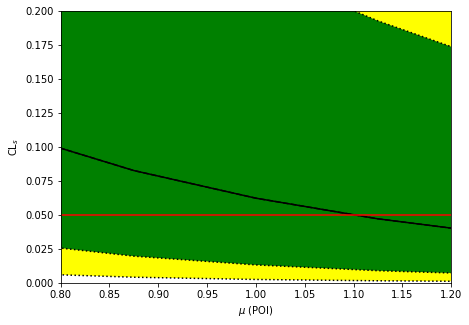

In [2]:
sig = np.array([1.777, 0.5])
bkg = np.array([0.021, 1.5])
err = 0.5 # flat percentage error to be added to all bkg yields for all bins
x_axis_range = [0.8, 1.2]

pyhf.set_backend("numpy")
model = pyhf.simplemodels.hepdata_like( signal_data=list(sig), bkg_data   =list(bkg), bkg_uncerts=list(bkg*err), )
data = list(bkg) + model.config.auxdata
poi_vals = np.linspace(0, 5, 41)
results = [ pyhf.infer.hypotest( test_poi, data, model, test_stat="qtilde", return_expected_set=True ) for test_poi in poi_vals ]
fig, ax = plt.subplots()
fig.set_size_inches(7, 5)
ax.set_xlabel(r"$\mu$ (POI)")
ax.set_ylabel(r"$\mathrm{CL}_{s}$")
pyhf.contrib.viz.brazil.plot_results(ax, poi_vals, results)
ax.set_ylim([0.,0.2])
ax.set_xlim(x_axis_range)